In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---

In [75]:
football = Table.read_table("./csv4/deflategate.csv")
football.show()

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


- ### 두 측정의 평균을 각 공에 할당

In [76]:
football = football.select("Team").with_column(
"Combined", (football.column(1) + football.column(2)) / 2
)
football.show()

Team,Combined
Patriots,11.65
Patriots,11.025
Patriots,11.325
Patriots,10.85
Patriots,11.275
Patriots,11.775
Patriots,12.075
Patriots,11.325
Patriots,11.15
Patriots,10.7


- ### 압력 감소를 확인하기 위한 초기 값 배열

In [77]:
patriots_start = 12.5 * np.ones(11)
colts_start = 13 * np.ones(4)

start = np.append(patriots_start, colts_start)
start

array([ 12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,  12.5,
        12.5,  12.5,  13. ,  13. ,  13. ,  13. ])

- ### 압력 감소율을 포함한 테이블 생성

In [78]:
football = football.with_column(
    "Pressure Drop", start - football.column(1)
)
football.show()

Team,Combined,Pressure Drop
Patriots,11.65,0.85
Patriots,11.025,1.475
Patriots,11.325,1.175
Patriots,10.85,1.65
Patriots,11.275,1.225
Patriots,11.775,0.725
Patriots,12.075,0.425
Patriots,11.325,1.175
Patriots,11.15,1.35
Patriots,10.7,1.8


- ### 두 그룹 각각의 평균 하락

In [79]:
football_avg = football.group("Team", np.average).drop(1)
football_avg

Team,Pressure Drop average
Colts,0.46875
Patriots,1.20227


- ### 두 그룹의 평균 하락 차이 = 관측값

In [95]:
orig_distance = football_avg.column(1).take(0) - football_avg.column(1).take(1)
orig_distance

-0.73352272727272805

<br>

- #### 귀무가설: 압력 감소 차이 없음
- #### 대립가설: 압력 감소 차이 있음

<br>

- ### 팀 셔플하여 배치

In [81]:
def table_with_shuffled():
    teams = football.sample(with_replacement=False).column(0)
    return football.with_column("Shuffled Team", teams).select((3, 2))

table_with_shuffled()

Shuffled Team,Pressure Drop
Colts,0.85
Colts,1.475
Patriots,1.175
Patriots,1.65
Patriots,1.225
Patriots,0.725
Colts,0.425
Patriots,1.175
Patriots,1.35
Patriots,1.8


- ### 무작위로 배치된 상태의 평균 차이

In [92]:
def one_simulated_distance():
    table = table_with_shuffled()
    table = table.group("Shuffled Team", np.average)
    return table.column(1).take(0) - table.column(1).take(1)

one_simulated_distance()

-0.060227272727272352

- ### 10000번 시뮬레이션 한 결과

In [93]:
distances = make_array()
for _ in range(10000):
    distances = np.append(distances, one_simulated_distance())

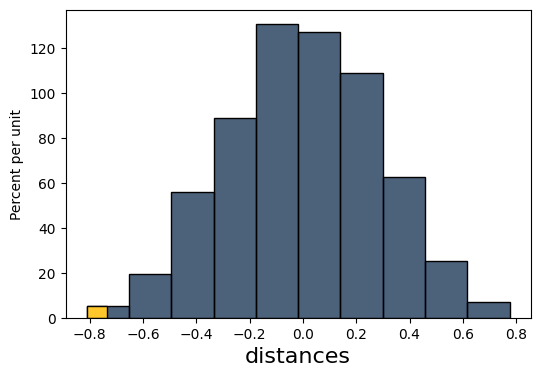

In [96]:
Table().with_column("distances", distances).hist(right_end=orig_distance)

- ### P-Value
    - ### 관측값은 히스토그램의 꼬리에 위치하므로 대립가설을 채택하여야 함

In [97]:
np.count_nonzero(distances <= orig_distance) / 10000

0.0033